# 01_image_conversion.ipynb
## Pruebas de Conversión Excel/PDF a Imágenes

Objetivo: Prototipar y validar conversión de Excel y PDF a imágenes PNG

In [3]:
import sys
from pathlib import Path
# Añadir el directorio PADRE (la raíz del proyecto) al path
sys.path.insert(0, str(Path.cwd().parent))
from src.preprocessors import excel_to_image
from src.utils.logger import get_logger
from src.utils.config import INPUT_EXCEL_DIR, INPUT_PDF_DIR, EXCEL_IMAGES_DIR, PDF_IMAGES_DIR

logger = get_logger(__name__)

## 1. Prueba: Excel a Imagen

In [4]:
# Listar archivos Excel disponibles
excel_files = list(INPUT_EXCEL_DIR.glob("*.xlsx"))
print(f"Archivos Excel encontrados: {len(excel_files)}")
for f in excel_files:
    print(f"  - {f.name}")

Archivos Excel encontrados: 1
  - 10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx


In [5]:
# Procesar primer Excel si existe
if excel_files:
    excel_file = excel_files[0]
    print(f"\nProcesando: {excel_file.name}")
    
    result = excel_to_image(str(excel_file))
    print(f"Resultado: {result['status']}")
    
    if result['status'] == 'success':
        print(f"HTML generado (primeros 200 chars):")
        print(result['html'][:200])
else:
    print("No hay archivos Excel en data/input/excel/")


Procesando: 10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx
2025-11-07 21:39:37,962 - src.preprocessors.excel_to_image - INFO - Iniciando conversión de Excel: c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\input\excel\10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1).xlsx
2025-11-07 21:39:38,672 - src.preprocessors.excel_to_image - INFO - Usando rango: A1:Z100
2025-11-07 21:39:38,678 - src.preprocessors.excel_to_image - INFO - Excel procesado: 10841- INFORME GENERAL - MN - SKY KNIGHT  -  LAS BAMBAS   - 09 -10 -2025 (1)
Resultado: success
HTML generado (primeros 200 chars):
<table border='1' cellpadding='5' cellspacing='0' style='font-family: Arial;'><tr><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><


## 2. Prueba: PDF a Imágenes

In [6]:
# Listar archivos PDF disponibles
pdf_files = list(INPUT_PDF_DIR.glob("*.pdf"))
print(f"Archivos PDF encontrados: {len(pdf_files)}")
for f in pdf_files:
    print(f"  - {f.name}")

Archivos PDF encontrados: 1
  - 25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR.pdf


In [9]:
# Obtener info del PDF
if pdf_files:
    pdf_file = pdf_files[0]
    print(f"\nAnalizando: {pdf_file.name}")
    
    from src.preprocessors.pdf_to_image import get_pdf_info
    info = get_pdf_info(str(pdf_file))
    print(f"Total de páginas: {info.get('total_pages', 'N/A')}")


Analizando: 25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR.pdf
Total de páginas: 1


In [12]:
from src.preprocessors.pdf_to_image import pdf_to_images
# Convertir PDF a imágenes (primeras 3 páginas)
if pdf_files:
    pdf_file = pdf_files[0]
    print(f"Convirtiendo PDF: {pdf_file.name}")
    
    # Solo primeras 3 páginas para testing
    result = pdf_to_images(str(pdf_file), dpi=150, page_range=[1, 3])
    
    print(f"Resultado: {result['status']}")
    print(f"Imágenes generadas: {result.get('image_count', 0)}")
    
    if result['status'] == 'success':
        print(f"Archivos: {result['metadata']['image_files']}")

Convirtiendo PDF: 25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR.pdf
2025-11-07 21:43:58,103 - src.preprocessors.pdf_to_image - INFO - Iniciando conversión de PDF: c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\input\pdf\25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR.pdf
2025-11-07 21:43:59,910 - src.preprocessors.pdf_to_image - INFO - PDF convertido: 1 páginas
2025-11-07 21:43:59,982 - src.preprocessors.pdf_to_image - INFO - Página 1 guardada: 25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR_page_1.png
2025-11-07 21:43:59,983 - src.preprocessors.pdf_to_image - INFO - Metadata guardada: c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\images\pdf_images\25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR_metadata.json
Resultado: success
Imágenes generadas: 1
Archivos: ['25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR_page_1.png']


## 3. Validación: Verificar Imágenes Generadas

In [13]:
# Listar imágenes generadas
excel_images = list(EXCEL_IMAGES_DIR.glob("*.png"))
pdf_images = list(PDF_IMAGES_DIR.glob("*.png"))

print(f"Imágenes de Excel: {len(excel_images)}")
print(f"Imágenes de PDF: {len(pdf_images)}")
print(f"Total: {len(excel_images) + len(pdf_images)}")

Imágenes de Excel: 0
Imágenes de PDF: 1
Total: 1


In [14]:
# Mostrar propiedades de imágenes
from PIL import Image

print("\nPropiedades de imágenes:")
all_images = excel_images + pdf_images

for img_path in all_images[:5]:  # Primeras 5
    img = Image.open(img_path)
    print(f"\n{img_path.name}:")
    print(f"  - Tamaño: {img.size}")
    print(f"  - Modo: {img.mode}")
    print(f"  - Bytes: {img_path.stat().st_size / 1024:.1f} KB")


Propiedades de imágenes:

25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR_page_1.png:
  - Tamaño: (2100, 1275)
  - Modo: RGB
  - Bytes: 211.2 KB


## 4. Visualización (si disponible)

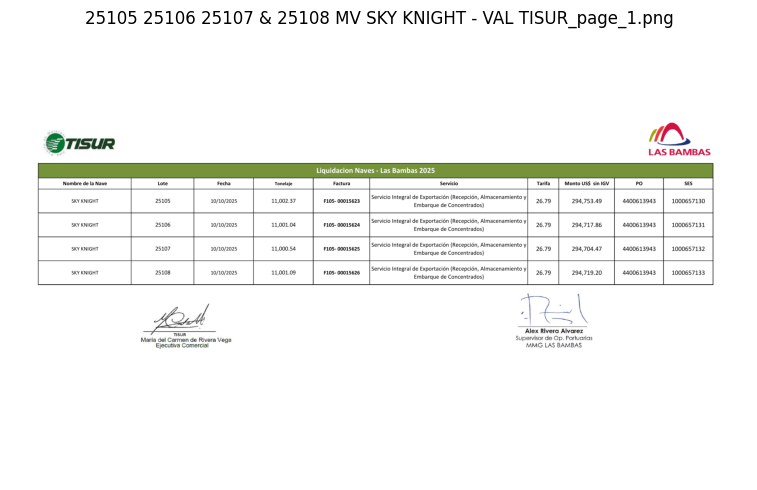

✅ Visualización guardada en image_conversion_preview.png


In [15]:
# Mostrar imágenes
import matplotlib.pyplot as plt

if all_images:
    # Mostrar primeras 3 imágenes
    fig, axes = plt.subplots(1, min(3, len(all_images)), figsize=(15, 5))
    
    if len(all_images) == 1:
        axes = [axes]
    elif len(all_images) == 2:
        axes = [axes[0], axes[1]]
    
    for idx, img_path in enumerate(all_images[:3]):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(img_path.name)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('image_conversion_preview.png', dpi=100, bbox_inches='tight')
    plt.show()
    print("✅ Visualización guardada en image_conversion_preview.png")
else:
    print("No hay imágenes para visualizar")

## 5. Comparación: Diferentes Resoluciones

In [16]:
# Comparar DPI (Quality vs Size)
if pdf_files:
    pdf_file = pdf_files[0]
    
    dpi_levels = [100, 150, 200, 300]
    results = {}
    
    for dpi in dpi_levels:
        print(f"\nProbando DPI: {dpi}")
        result = pdf_to_images(str(pdf_file), dpi=dpi, page_range=[1, 1])
        
        if result['status'] == 'success':
            # Obtener tamaño del archivo
            images = list(PDF_IMAGES_DIR.glob(f"*{dpi}*")) if dpi != 300 else list(PDF_IMAGES_DIR.glob("*.png"))
            if images:
                size_kb = images[0].stat().st_size / 1024
                results[dpi] = size_kb
                print(f"  ✅ Tamaño: {size_kb:.1f} KB")
    
    print(f"\nComparación DPI:")
    for dpi, size in results.items():
        print(f"  DPI {dpi}: {size:.1f} KB")


Probando DPI: 100
2025-11-07 21:44:24,549 - src.preprocessors.pdf_to_image - INFO - Iniciando conversión de PDF: c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\input\pdf\25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR.pdf
2025-11-07 21:44:25,789 - src.preprocessors.pdf_to_image - INFO - PDF convertido: 1 páginas
2025-11-07 21:44:25,818 - src.preprocessors.pdf_to_image - INFO - Página 1 guardada: 25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR_page_1.png
2025-11-07 21:44:25,820 - src.preprocessors.pdf_to_image - INFO - Metadata guardada: c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\images\pdf_images\25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR_metadata.json

Probando DPI: 150
2025-11-07 21:44:25,822 - src.preprocessors.pdf_to_image - INFO - Iniciando conversión de PDF: c:\Users\Usuario\Documents\UTEC\Liquidaciones Agent\multidoc-agent\data\input\pdf\25105 25106 25107 & 25108 MV SKY KNIGHT - VAL TISUR.pdf
2025-11-07 21:4

## 6. Resumen y Estadísticas

In [17]:
print("="*60)
print("RESUMEN: CONVERSIÓN A IMÁGENES")
print("="*60)
print(f"\nExcel procesados: {len(excel_files)}")
print(f"PDF procesados: {len(pdf_files)}")
print(f"\nImágenes generadas:")
print(f"  - De Excel: {len(excel_images)}")
print(f"  - De PDF: {len(pdf_images)}")
print(f"  - Total: {len(excel_images) + len(pdf_images)}")
print(f"\nEstructura listo para:")
print(f"  ✅ OCR Extraction (siguiente notebook)")
print(f"  ✅ CLIP Encoding (notebook 03)")
print(f"  ✅ ChromaDB Indexing (notebook 04)")
print("="*60)

RESUMEN: CONVERSIÓN A IMÁGENES

Excel procesados: 1
PDF procesados: 1

Imágenes generadas:
  - De Excel: 0
  - De PDF: 1
  - Total: 1

Estructura listo para:
  ✅ OCR Extraction (siguiente notebook)
  ✅ CLIP Encoding (notebook 03)
  ✅ ChromaDB Indexing (notebook 04)
